In [1]:
import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from datetime import datetime
from matplotlib import style



In [2]:
# INDZ 1
data_eur = pd.read_csv('C:/Users/Admin/Desktop/PROG_KURS/EUR.csv', sep = ';',encoding="cp1251")
data_dol = pd.read_csv('C:/Users/Admin/Desktop/PROG_KURS/DOL.csv', sep = ';',encoding="cp1251")
data_eur

,DATA,COURSE BUY,COURSE SELL,COUNT AGREEMENT,SALLING AND BUYING MILL.EURS,AVG COURSE
0,2010-01-04,11.4520,11.4840,NaN,NaN,NaN
1,2010-01-05,11.5110,11.5360,NaN,NaN,NaN
2,2010-01-06,11.5110,11.5360,NaN,NaN,NaN
3,2010-01-11,11.6560,11.6830,NaN,NaN,NaN
4,2010-01-12,11.6740,11.6920,NaN,NaN,NaN
5,2010-01-13,11.7550,11.7910,NaN,NaN,NaN
6,2010-01-14,11.6910,11.7180,NaN,NaN,NaN
7,2010-01-15,11.5920,11.6350,NaN,NaN,NaN
8,2010-01-18,11.5940,11.6180,NaN,NaN,NaN
9,2010-01-19,11.5710,11.5850,NaN,NaN,NaN


In [3]:
data_eur.info()
data_dol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 6 columns):
DATA                            2022 non-null object
COURSE BUY                      2022 non-null float64
COURSE SELL                     2022 non-null float64
COUNT AGREEMENT                 878 non-null float64
SALLING AND BUYING MILL.EURS    878 non-null float64
AVG COURSE                      879 non-null float64
dtypes: float64(5), object(1)
memory usage: 94.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 6 columns):
DATA                               2022 non-null object
COURSE BUY                         2022 non-null float64
COURSE SELL                        2022 non-null float64
COUNT AGREEMENT                    878 non-null float64
SALLING AND BUYING MILL.DOLLARS    878 non-null float64
AVG COURSE                         879 non-null float64
dtypes: float64(5), object(1)
memory usage: 94.9+ KB


In [4]:
data_eur['DATA'] = pd.to_datetime(data_eur['DATA'])
data_dol['DATA'] = pd.to_datetime(data_dol['DATA'])
data_eur['COURSE BUY'] =  pd.to_numeric(data_eur['COURSE BUY'])
data_eur['COURSE SELL'] =  pd.to_numeric(data_eur['COURSE SELL'])
data_eur['COUNT AGREEMENT'] =  pd.to_numeric(data_eur['COUNT AGREEMENT'])
data_eur['SALLING AND BUYING MILL.EURS'] =  pd.to_numeric(data_eur['SALLING AND BUYING MILL.EURS'])
data_eur['AVG COURSE'] =  pd.to_numeric(data_eur['AVG COURSE'])
data_dol['COURSE BUY'] =  pd.to_numeric(data_dol['COURSE BUY'])
data_dol['COURSE SELL'] =  pd.to_numeric(data_dol['COURSE SELL'])
data_dol['COUNT AGREEMENT'] =  pd.to_numeric(data_dol['COUNT AGREEMENT'])
data_dol['SALLING AND BUYING MILL.DOLLARS'] =  pd.to_numeric(data_dol['SALLING AND BUYING MILL.DOLLARS'])
data_dol['AVG COURSE'] =  pd.to_numeric(data_dol['AVG COURSE'])

data = pd.DataFrame()
data['DATA'] = data_eur['DATA']
data['COURSE BUY EUR'] = data_eur['COURSE BUY']
data['COURSE BUY DOLL'] = data_dol['COURSE BUY']

data

,DATA,COURSE BUY EUR,COURSE BUY DOLL
0,2010-01-04,11.4520,7.9820
1,2010-01-05,11.5110,7.9780
2,2010-01-06,11.5110,8.0270
3,2010-01-11,11.6560,8.0250
4,2010-01-12,11.6740,8.0570
5,2010-01-13,11.7550,8.0690
6,2010-01-14,11.6910,8.0730
7,2010-01-15,11.5920,8.0630
8,2010-01-18,11.5940,8.0660
9,2010-01-19,11.5710,8.1041


In [5]:
def analis_speed_intens (din, data):
    data_bas_analis = pd.DataFrame(columns=['DATA','LAN PRIRIST', 'BAS PRIRIST', 'LAN TEMP ZRIST', 'BAS TEMP ZRIST', 'LAN TEMP PRIRIST', 'BAS TEMP PRIRIST', 'ABS PRISKOR', 'RLT PRISKOR'])
    data_bas_analis['DATA'] = data
    i=0
    n = len(din)
    for i in range(n-1):

        data_bas_analis.loc[i+1,'LAN PRIRIST'] =  din.loc[i+1]-din.loc[i]
        
        data_bas_analis.loc[i+1,'BAS PRIRIST'] = din.loc[i+1]-din.loc[0]
    
        data_bas_analis.loc[i+1,'LAN TEMP ZRIST'] =  din.loc[i+1]/din.loc[i]
    
        data_bas_analis.loc[i+1,'BAS TEMP ZRIST'] = din.loc[i+1]/din.loc[0]
        
        data_bas_analis.loc[i+1,'LAN TEMP PRIRIST'] =  (din.loc[i+1]-din.loc[i])/din.loc[i]
    
        data_bas_analis.loc[i+1,'BAS TEMP PRIRIST'] = (din.loc[i+1]-din.loc[0])/din.loc[0]

    i=0
    n = len( data_bas_analis['LAN PRIRIST'])
    for i in range(n-1):
        data_bas_analis.loc[i+1,'ABS PRISKOR'] = data_bas_analis.loc[i+1,'LAN PRIRIST']-data_bas_analis.loc[i,'LAN PRIRIST']

    i = 0    
    n = len( data_bas_analis['ABS PRISKOR'])
    for i in range(n-1):
        data_bas_analis.loc[i+1,'RLT PRISKOR'] = data_bas_analis.loc[i+1,'ABS PRISKOR']/data_bas_analis.loc[i,'LAN PRIRIST']
    return data_bas_analis

def avg_riven (data, method):
    data = data.fillna(0)
    dt = []
    dt = data.as_matrix()
    if method == 1:
        avg_r = (dt[0]+dt[-1])/2
    if method == 2:
        avg_r = (dt[0]/2 + dt[1:-2].sum() + dt[-1]/2)/(len(dt)-1)
    return avg_r


def avg_abs_pririst(data, method):
    data = data.fillna(0)
    dt=[]
    dt = data.as_matrix()
    if method == 1:
        avg_a_p = (dt[0:].sum())/len(dt)
    if method == 2:
        avg_a_p = (2*dt[0:].sum())/(len(dt)*(len(dt)-1))
    return avg_a_p

def avg_temp_zrist__pririst(data, method):
    data = data.fillna(1)
    dt=[]
    dt = data.as_matrix()
    if method == 1:
        avg_t_z = math.pow((dt.prod()),(1/len(dt)))
        avg_t_p = avg_t_z - 1
    if method == 2:
        avg_t_z = dt.sum()/dt[0]
        avg_t_p = avg_t_z - 1
    return (avg_t_z, avg_t_p)
    
def moving_average(data) :
    dt = data.as_matrix()
    a = []
    i = 0
    for i in range(len(dt)-2):
        a.append((dt[i]+dt[i+1]+dt[i+2])/3) 
    return a

def zv_moving_average(data) :
    dt = data.as_matrix()
    a = []

    i = 0
    for i in range(len(dt)-2):
        a.append((10*dt[i]+15*dt[i+1]+10*dt[i+2])/35)

    return a

In [6]:
data_bas_analis_eur = analis_speed_intens(data['COURSE BUY EUR'],data['DATA'])
data_bas_analis_dol = analis_speed_intens(data['COURSE BUY DOLL'],data['DATA'])
#data_bas_analis_dol = data_bas_analis_dol.set_index('DATA')
#data_bas_analis_eur = data_bas_analis_eur.set_index('DATA')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


In [7]:
data_bas_analis_eur

,DATA,LAN PRIRIST,BAS PRIRIST,LAN TEMP ZRIST,BAS TEMP ZRIST,LAN TEMP PRIRIST,BAS TEMP PRIRIST,ABS PRISKOR,RLT PRISKOR
0,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,0.059,0.059,1.00515,1.00515,0.00515194,0.00515194,NaN,NaN
2,2010-01-06,0,0.059,1,1.00515,0,0.00515194,-0.059,-1
3,2010-01-11,0.145,0.204,1.0126,1.01781,0.0125966,0.0178135,0.145,inf
4,2010-01-12,0.018,0.222,1.00154,1.01939,0.00154427,0.0193853,-0.127,-0.875862
5,2010-01-13,0.081,0.303,1.00694,1.02646,0.0069385,0.0264583,0.063,3.5
6,2010-01-14,-0.064,0.239,0.994556,1.02087,-0.00544449,0.0208697,-0.145,-1.79012
7,2010-01-15,-0.099,0.14,0.991532,1.01222,-0.00846805,0.0122249,-0.035,0.546875
8,2010-01-18,0.002,0.142,1.00017,1.0124,0.000172533,0.0123996,0.101,-1.0202
9,2010-01-19,-0.023,0.119,0.998016,1.01039,-0.00198378,0.0103912,-0.025,-12.5


In [8]:
data_bas_analis_dol

,DATA,LAN PRIRIST,BAS PRIRIST,LAN TEMP ZRIST,BAS TEMP ZRIST,LAN TEMP PRIRIST,BAS TEMP PRIRIST,ABS PRISKOR,RLT PRISKOR
0,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,-0.004,-0.004,0.999499,0.999499,-0.000501128,-0.000501128,NaN,NaN
2,2010-01-06,0.049,0.045,1.00614,1.00564,0.00614189,0.00563768,0.053,-13.25
3,2010-01-11,-0.002,0.043,0.999751,1.00539,-0.000249159,0.00538712,-0.051,-1.04082
4,2010-01-12,0.032,0.075,1.00399,1.0094,0.00398754,0.00939614,0.034,-17
5,2010-01-13,0.012,0.087,1.00149,1.0109,0.00148939,0.0108995,-0.02,-0.625
6,2010-01-14,0.004,0.091,1.0005,1.0114,0.000495724,0.0114007,-0.008,-0.666667
7,2010-01-15,-0.01,0.081,0.998761,1.01015,-0.0012387,0.0101478,-0.014,-3.5
8,2010-01-18,0.003,0.084,1.00037,1.01052,0.00037207,0.0105237,0.013,-1.3
9,2010-01-19,0.0381,0.1221,1.00472,1.0153,0.00472353,0.0152969,0.0351,11.7


In [9]:
ar_1_eur = avg_riven(data['COURSE BUY EUR'],1)
print ('avg_riven method 1 =',ar_1_eur)
ar_2_eur = avg_riven(data['COURSE BUY EUR'],2)
print ('avg_riven method 2 =',ar_2_eur)

aap_1_eur = avg_abs_pririst(data_bas_analis_eur['LAN PRIRIST'],1)
print ('avg_abs_pririst method 1 =',aap_1_eur)
aap_2_eur = avg_abs_pririst(data_bas_analis_eur['BAS PRIRIST'],2)
print ('avg_abs_pririst method 2 =',aap_2_eur)

atzp_1_eur = avg_temp_zrist__pririst(data_bas_analis_eur['LAN TEMP ZRIST'],1)
print ('avg_temp_zrist__pririst method 1 =',atzp_1_eur)

ar_1_dol = avg_riven(data['COURSE BUY DOLL'],1)
print ('avg_riven method 1 =',ar_1_dol)
ar_2_dol = avg_riven(data['COURSE BUY DOLL'],2)
print ('avg_riven method 2 =',ar_2_dol)

aap_1_dol = avg_abs_pririst(data_bas_analis_dol['LAN PRIRIST'],1)
print ('avg_abs_pririst method 1 =',aap_1_dol)
aap_2_dol = avg_abs_pririst(data_bas_analis_dol['BAS PRIRIST'],2)
print ('avg_abs_pririst method 2 =',aap_2_dol)

atzp_1_dol = avg_temp_zrist__pririst(data_bas_analis_dol['LAN TEMP ZRIST'],1)
print ('avg_temp_zrist__pririst method 1 =',atzp_1_dol)

#print ('avg_temp_zrist__pririst method 2 =',avg_temp_zrist__pririst(data['COURSE BUY EUR'],2))

avg_riven method 1 = 22.09695
avg_riven method 2 = 17.9740534636
avg_abs_pririst method 1 = 0.0105291295747
avg_abs_pririst method 2 = 0.00647217137955
avg_temp_zrist__pririst method 1 = (1.000519665749025, 0.0005196657490249557)
avg_riven method 1 = 17.291
avg_riven method 2 = 15.0198771895
avg_abs_pririst method 1 = 0.00920771513353
avg_abs_pririst method 2 = 0.0069788970508
avg_temp_zrist__pririst method 1 = (1.0005954898990155, 0.0005954898990154778)


In [10]:
data_eur_mov_avg = pd.DataFrame(moving_average(data['COURSE BUY EUR']))
data_eur_zv_mov_avg = pd.DataFrame(zv_moving_average(data['COURSE BUY EUR']))
data_dol_mov_avg = pd.DataFrame(moving_average(data['COURSE BUY DOLL']))
data_dol_zv_mov_avg = pd.DataFrame(zv_moving_average(data['COURSE BUY DOLL']))
i = 0
for i in range(500):
    data_eur_mov_avg = pd.DataFrame(moving_average(data_eur_mov_avg))
    data_eur_zv_mov_avg = pd.DataFrame(zv_moving_average(data_eur_zv_mov_avg))
    data_dol_mov_avg = pd.DataFrame(moving_average(data_dol_mov_avg))
    data_dol_zv_mov_avg = pd.DataFrame(zv_moving_average(data_dol_zv_mov_avg))

In [11]:
data_eur_mov_avg

,0
0,10.502449
1,10.500957
2,10.499939
3,10.499378
4,10.499254
5,10.499545
6,10.500230
7,10.501282
8,10.502675
9,10.504383


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()
  after removing the cwd from sys.path.


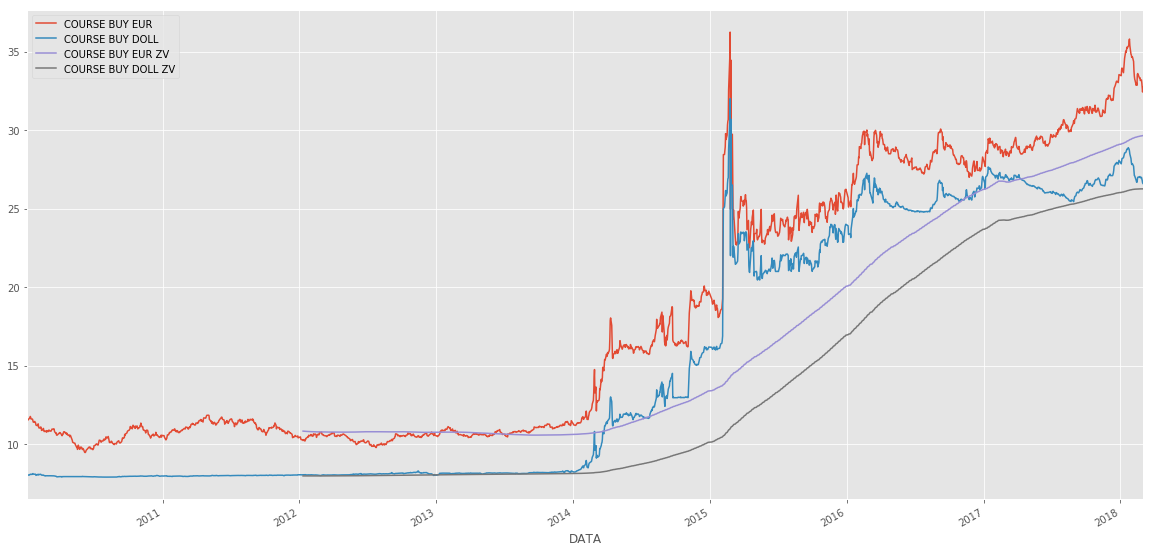

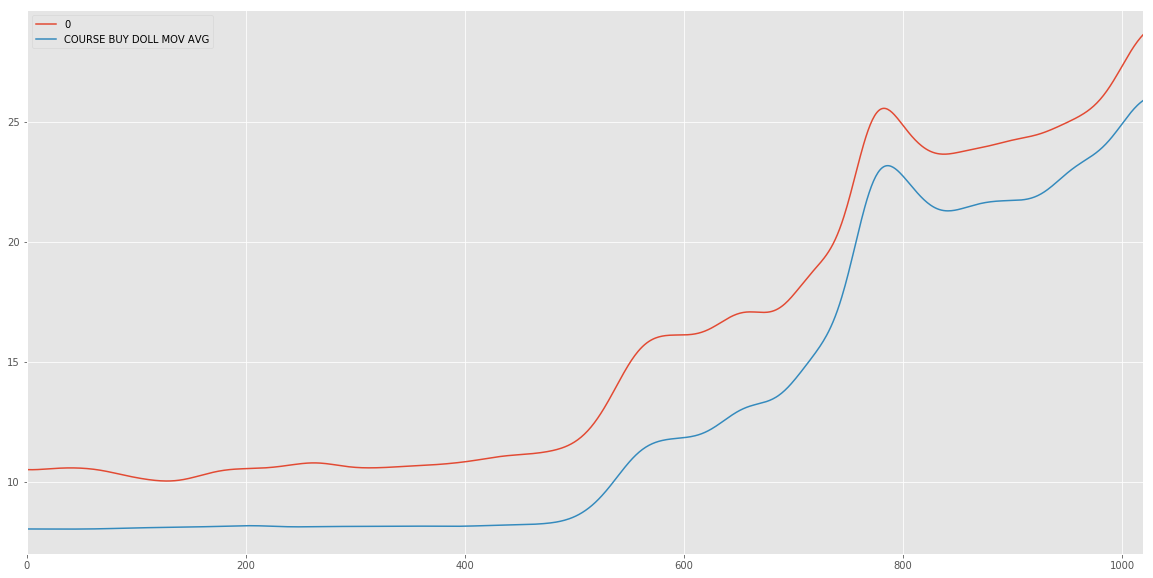

In [12]:
data_vis = data

dt_m_eur = pd.rolling_mean(data['COURSE BUY EUR'], 500)
dt_m_dol = pd.rolling_mean(data['COURSE BUY DOLL'], 500)

data_vis['COURSE BUY EUR ZV'] = dt_m_eur
data_vis['COURSE BUY DOLL ZV'] = dt_m_dol

data_vis_zv = data_eur_mov_avg
data_vis_zv['COURSE BUY DOLL MOV AVG'] = data_dol_mov_avg
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)

data_vis.plot(x='DATA', style='-')
data_vis_zv.plot(style='-')

plt.show()

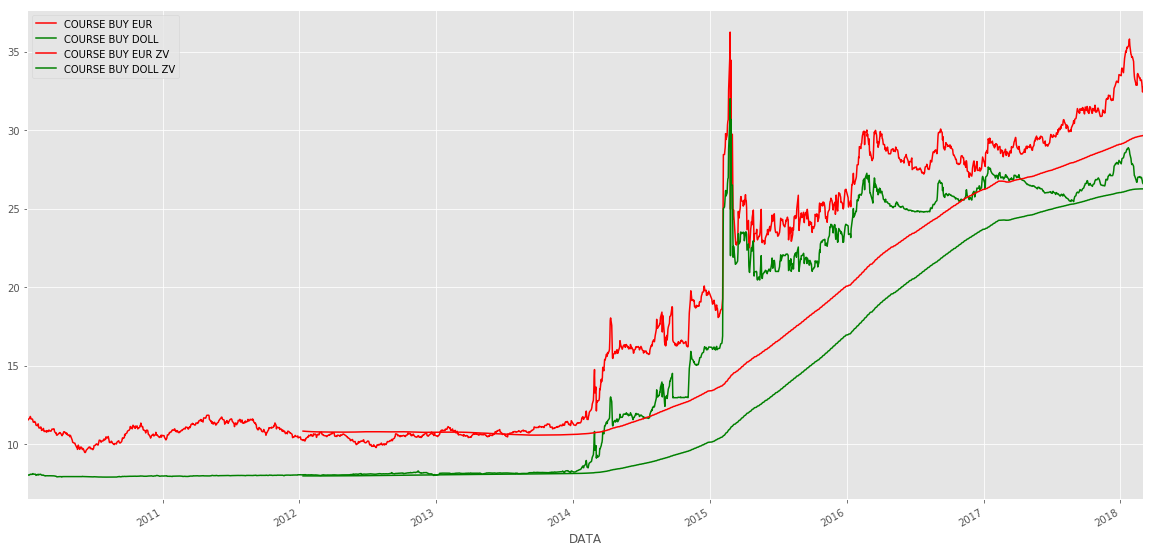

In [13]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
data.plot(x = 'DATA', style = '-', color = ['r','g'])

plt.show()

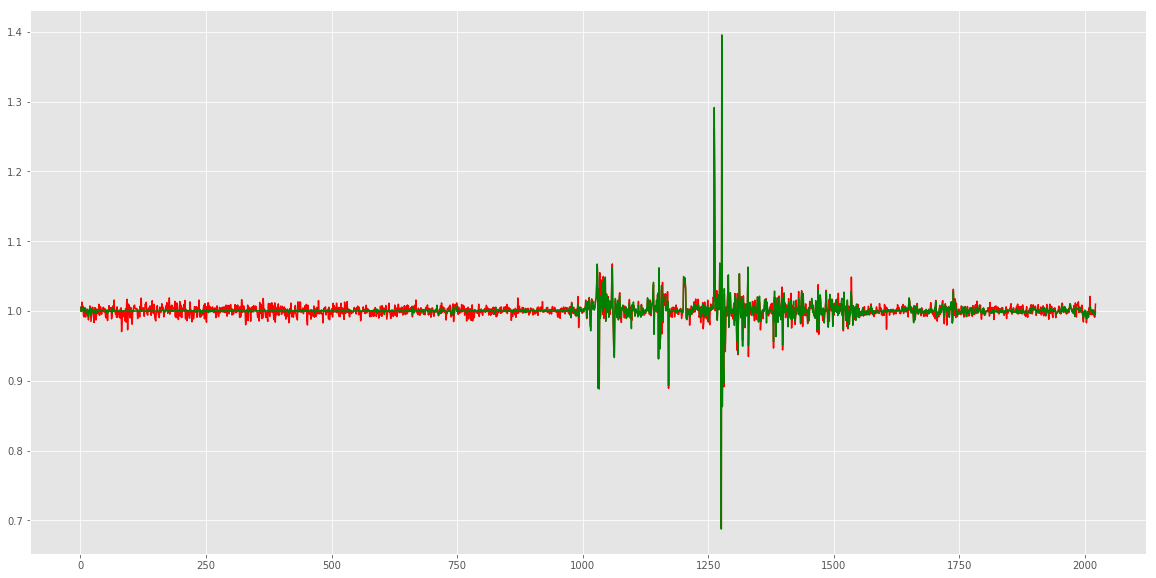

In [14]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['LAN TEMP ZRIST'], color = 'r')
plt.plot(data_bas_analis_dol['LAN TEMP ZRIST'], color = 'g')
plt.show()

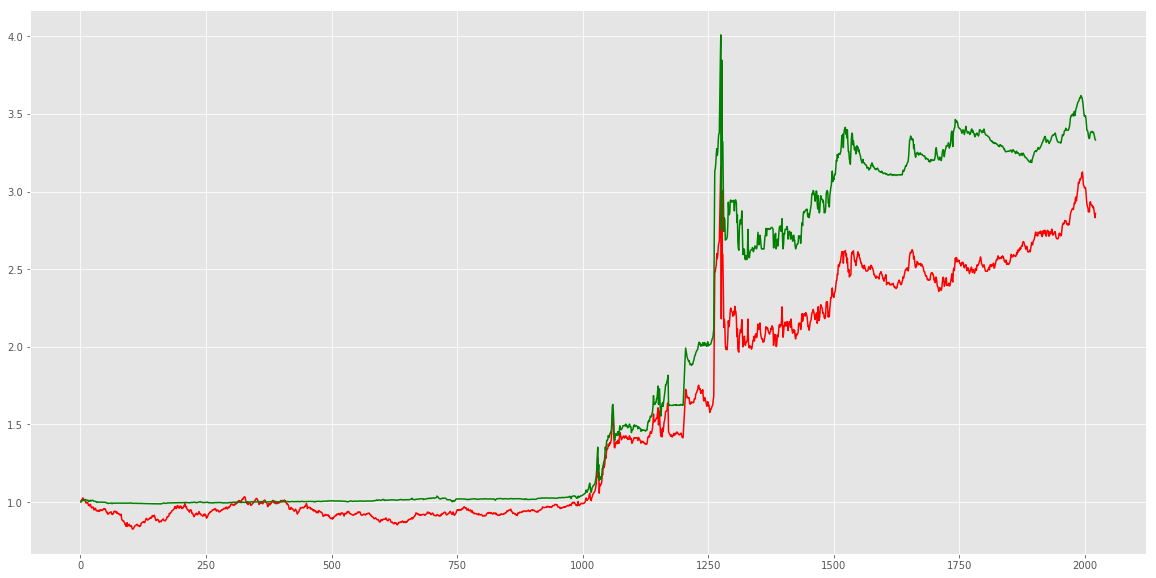

In [15]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['BAS TEMP ZRIST'], color = 'r')
plt.plot(data_bas_analis_dol['BAS TEMP ZRIST'], color = 'g')
plt.show()

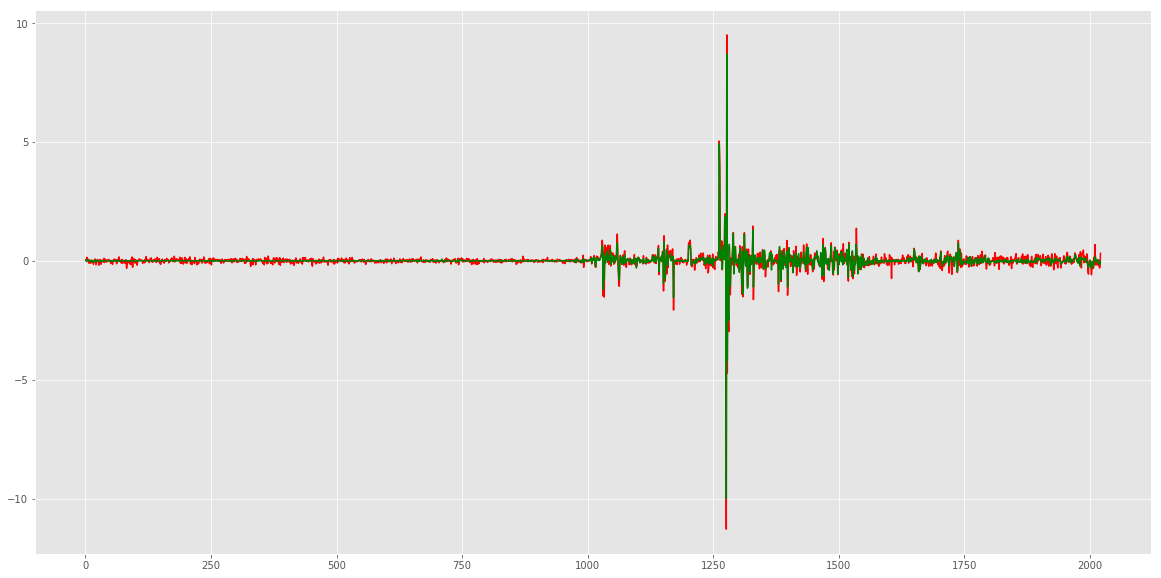

In [16]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['LAN PRIRIST'], color = 'r')
plt.plot(data_bas_analis_dol['LAN PRIRIST'], color = 'g')
plt.show()

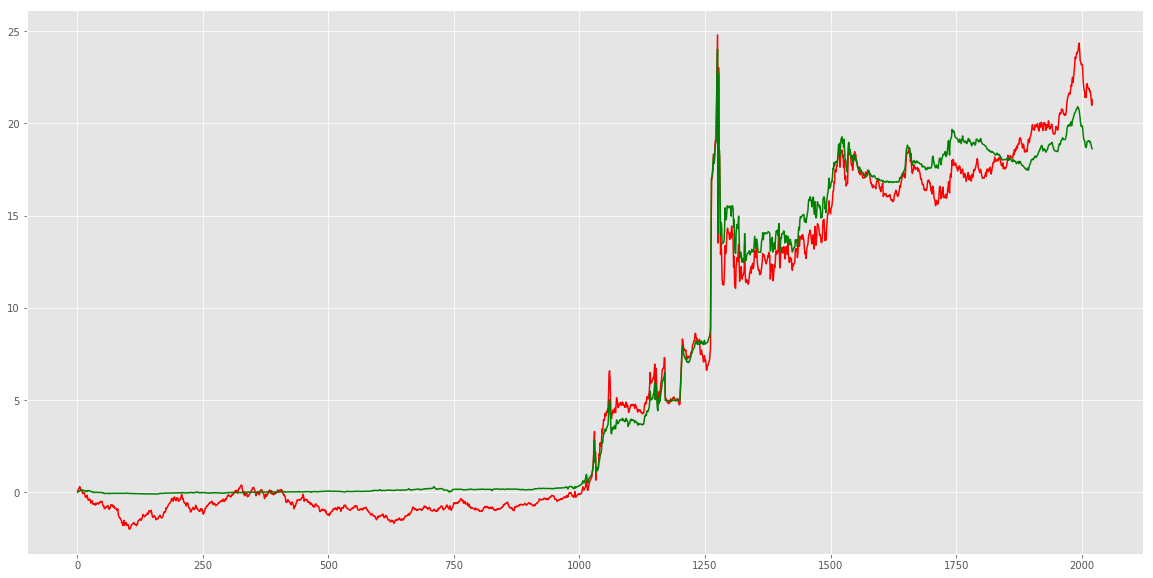

In [17]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['BAS PRIRIST'], color = 'r')
plt.plot(data_bas_analis_dol['BAS PRIRIST'], color = 'g')
plt.show()

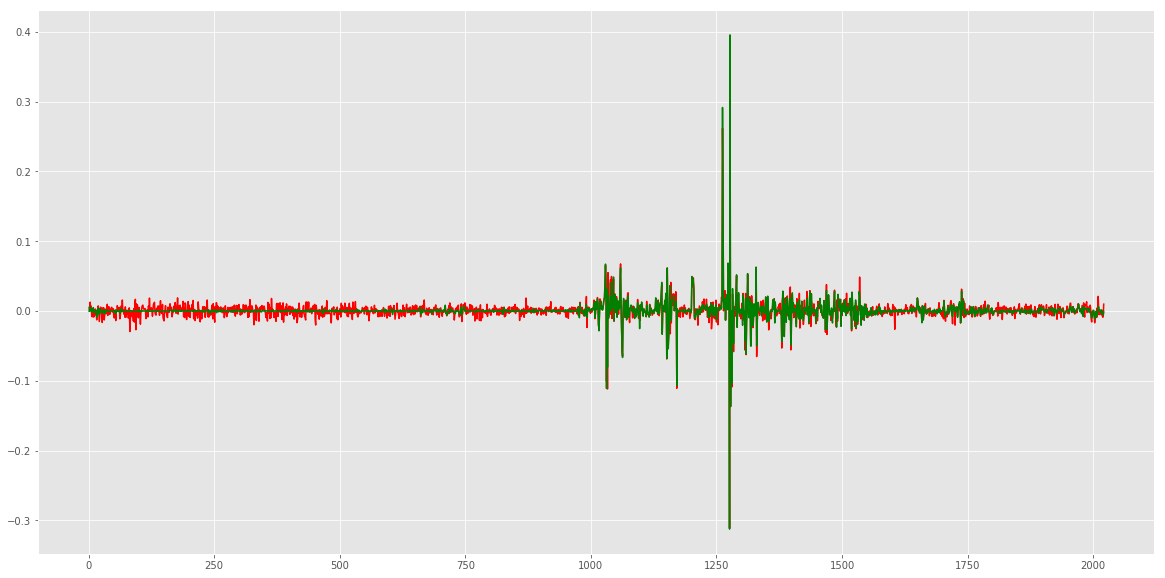

In [18]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['LAN TEMP PRIRIST'], color = 'r')
plt.plot(data_bas_analis_dol['LAN TEMP PRIRIST'], color = 'g')
plt.show()

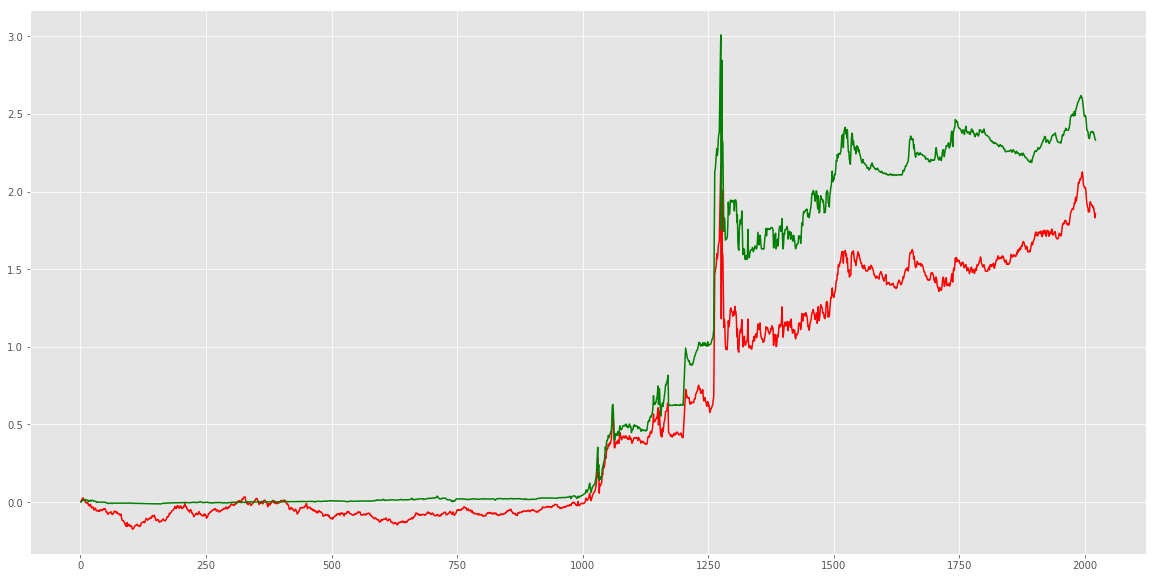

In [19]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['BAS TEMP PRIRIST'], color = 'r')
plt.plot(data_bas_analis_dol['BAS TEMP PRIRIST'], color = 'g')
plt.show()

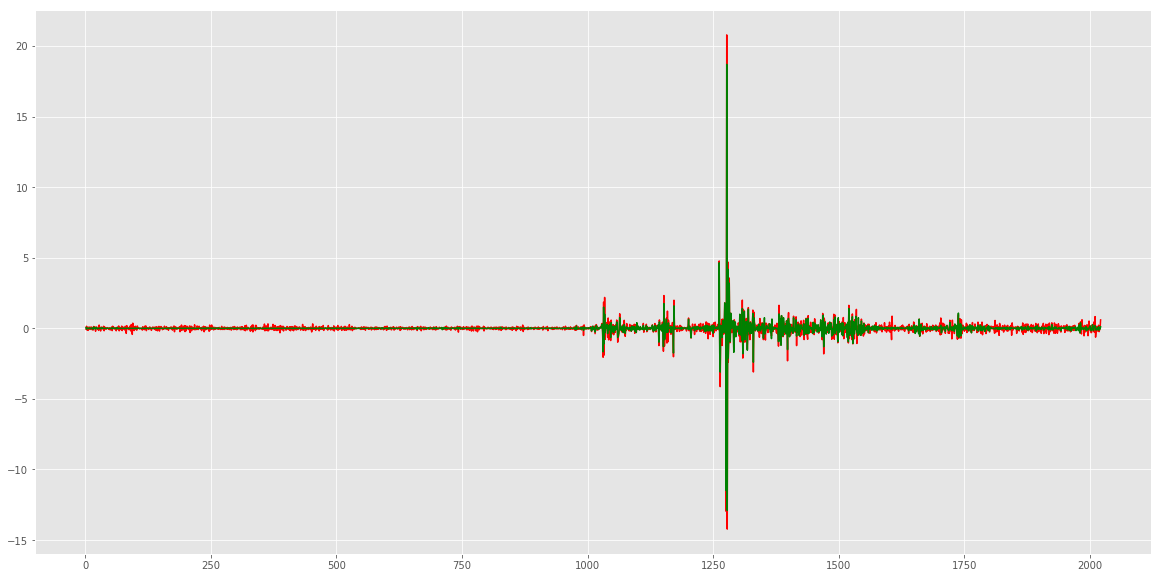

In [20]:

plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['ABS PRISKOR'], color = 'r')
plt.plot(data_bas_analis_dol['ABS PRISKOR'], color = 'g')
plt.show()

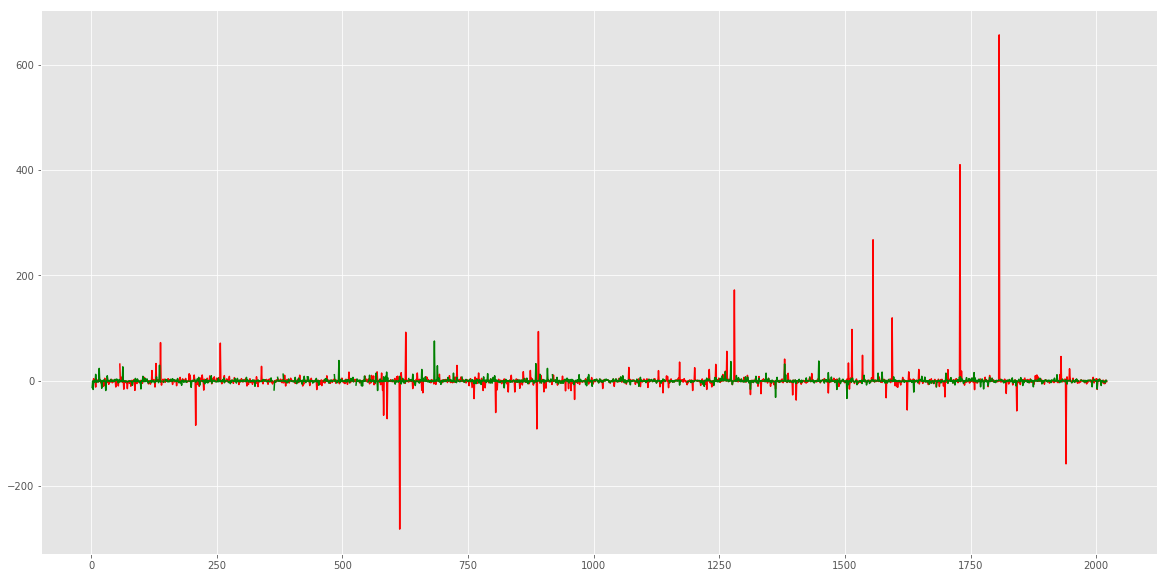

In [21]:
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(data_bas_analis_eur['RLT PRISKOR'], color = 'r')
plt.plot(data_bas_analis_dol['RLT PRISKOR'], color = 'g')
plt.show()

In [22]:
# INDZ 2
data_1 = data.loc[0:((len(data)/2)-1)]
data_2 = data.loc[(len(data)/2): len(data)]
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 5 columns):
DATA                  1011 non-null datetime64[ns]
COURSE BUY EUR        1011 non-null float64
COURSE BUY DOLL       1011 non-null float64
COURSE BUY EUR ZV     512 non-null float64
COURSE BUY DOLL ZV    512 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 39.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 1011 to 2021
Data columns (total 5 columns):
DATA                  1011 non-null datetime64[ns]
COURSE BUY EUR        1011 non-null float64
COURSE BUY DOLL       1011 non-null float64
COURSE BUY EUR ZV     1011 non-null float64
COURSE BUY DOLL ZV    1011 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 39.6 KB


In [23]:
dt_mean_1 = data_1.mean()
dt_std_1 = data_1.std()
dt_dispers_1 = dt_std_1**2
dt_mean_2 = data_2.mean()
dt_std_2 = data_2.std()
dt_dispers_2 = dt_std_2**2


In [24]:
print(u"Сер. значення 1-ї частини")
print(dt_mean_1)
print(u"Сер. кв. відхилення 1-ї частини")
print(dt_std_1)
print(u"Дисперсія 1-ї частини")
print(dt_dispers_1)
print(u"Сер. значення 2-ї частини")
print(dt_mean_2)
print(u"Сер. кв. відхилення 2-ї частини")
print(dt_std_2)
print(u"Дисперсія 2-ї частини")
print(dt_dispers_2)

Сер. значення 1-ї частини
COURSE BUY EUR        10.732096
COURSE BUY DOLL        8.050785
COURSE BUY EUR ZV     10.706706
COURSE BUY DOLL ZV     8.038564
dtype: float64
Сер. кв. відхилення 1-ї частини
COURSE BUY EUR        0.461557
COURSE BUY DOLL       0.105485
COURSE BUY EUR ZV     0.079602
COURSE BUY DOLL ZV    0.051081
dtype: float64
Дисперсія 1-ї частини
COURSE BUY EUR        0.213035
COURSE BUY DOLL       0.011127
COURSE BUY EUR ZV     0.006336
COURSE BUY DOLL ZV    0.002609
dtype: float64
Сер. значення 2-ї частини
COURSE BUY EUR        25.252163
COURSE BUY DOLL       22.017565
COURSE BUY EUR ZV     20.394338
COURSE BUY DOLL ZV    17.476110
dtype: float64
Сер. кв. відхилення 2-ї частини
COURSE BUY EUR        5.682939
COURSE BUY DOLL       5.731420
COURSE BUY EUR ZV     6.349415
COURSE BUY DOLL ZV    6.463836
dtype: float64
Дисперсія 2-ї частини
COURSE BUY EUR        32.295792
COURSE BUY DOLL       32.849178
COURSE BUY EUR ZV     40.315071
COURSE BUY DOLL ZV    41.781174
dtype: fl

In [25]:
F = dt_dispers_2/dt_dispers_1
df1 = len(data_1)-1
df2 = len(data_2)-1
print(F)
alpha = 0.05
p_value_eur = sp.f.cdf(F['COURSE BUY EUR'], df1, df2)
p_value_dol = sp.f.cdf(F['COURSE BUY DOLL'], df1, df2)
print(p_value_eur)
if p_value_eur > alpha:
    print('True')

print(p_value_dol)
if p_value_dol > alpha:
    print('True')


COURSE BUY EUR          151.598721
COURSE BUY DOLL        2952.209109
COURSE BUY EUR ZV      6362.436090
COURSE BUY DOLL ZV    16012.761236
dtype: float64
1.0
True
1.0
True


In [26]:
'''
S_EUR = math.pow((df1*dt_dispers_1['COURSE BUY EUR']+df2*dt_dispers_2['COURSE BUY EUR'])/(df1+df2),0.5)

S_DOLL = math.pow((df1*dt_dispers_1['COURSE BUY DOLL']+df2*dt_dispers_2['COURSE BUY DOLL'])/(df1+df2),0.5)

t_EUR = abs(dt_mean_1['COURSE BUY EUR']+dt_mean_2['COURSE BUY EUR'])/(S_EUR*math.pow((1/len(data_1))+(1/len(data_2)),0.5))

t_DOLL = abs(dt_mean_1['COURSE BUY DOLL']+dt_mean_2['COURSE BUY DOLL'])/(S_DOLL*math.pow((1/len(data_1))+(1/len(data_2)),0.5))
'''

Z_EUR = float(abs(dt_mean_1['COURSE BUY EUR']+dt_mean_2['COURSE BUY EUR'])/(math.pow((dt_dispers_1['COURSE BUY EUR']/len(data_1))+(dt_dispers_2['COURSE BUY EUR']/len(data_2)),0.5)))

Z_DOLL = float(abs(dt_mean_1['COURSE BUY DOLL']+dt_mean_2['COURSE BUY DOLL'])/(math.pow((dt_dispers_1['COURSE BUY DOLL']/len(data_1))+(dt_dispers_2['COURSE BUY DOLL']/len(data_2)),0.5)))


In [27]:
Z_EUR

200.6723275764573

In [28]:
Z_DOLL

166.7820816562344

In [29]:
F_z_kr = (1-0.05)/2
F_z_kr

0.475

In [30]:
Z_kr = float(1.96)
if Z_EUR < Z_kr:
    print("True")
if Z_EUR > Z_kr:
    print("False")
if Z_DOLL < Z_kr:
    print("True")
if Z_DOLL > Z_kr:
    print("False")

False
False


In [31]:

i = 0
dt = data['DATA'].as_matrix()
for i in range(360):
    
    last_date = dt[-1]
    last_date += np.timedelta64(1, 'D')
    dt = np.append(dt, last_date)


dt_prog = data['COURSE BUY EUR'].as_matrix()

i = 0
for i in range(360):
    dt_prog = np.append(dt_prog,dt_prog[-1] + aap_1_eur)
    
dt_prog_d = data['COURSE BUY DOLL'].as_matrix()
i = 0
for i in range(360):
    dt_prog_d = np.append(dt_prog_d,dt_prog_d[-1] + aap_1_dol)

    
data_p = pd.DataFrame(dt, columns=['DATA'])
data_p['COURSE BUY EUR'] = pd.DataFrame(dt_prog)
data_p['COURSE BUY DOLL'] = pd.DataFrame(dt_prog_d)
data_p = data_p.set_index('DATA')



data_p


,COURSE BUY EUR,COURSE BUY DOLL
DATA,,
2010-01-04,11.452000,7.982000
2010-01-05,11.511000,7.978000
2010-01-06,11.511000,8.027000
2010-01-11,11.656000,8.025000
2010-01-12,11.674000,8.057000
2010-01-13,11.755000,8.069000
2010-01-14,11.691000,8.073000
2010-01-15,11.592000,8.063000
2010-01-18,11.594000,8.066000


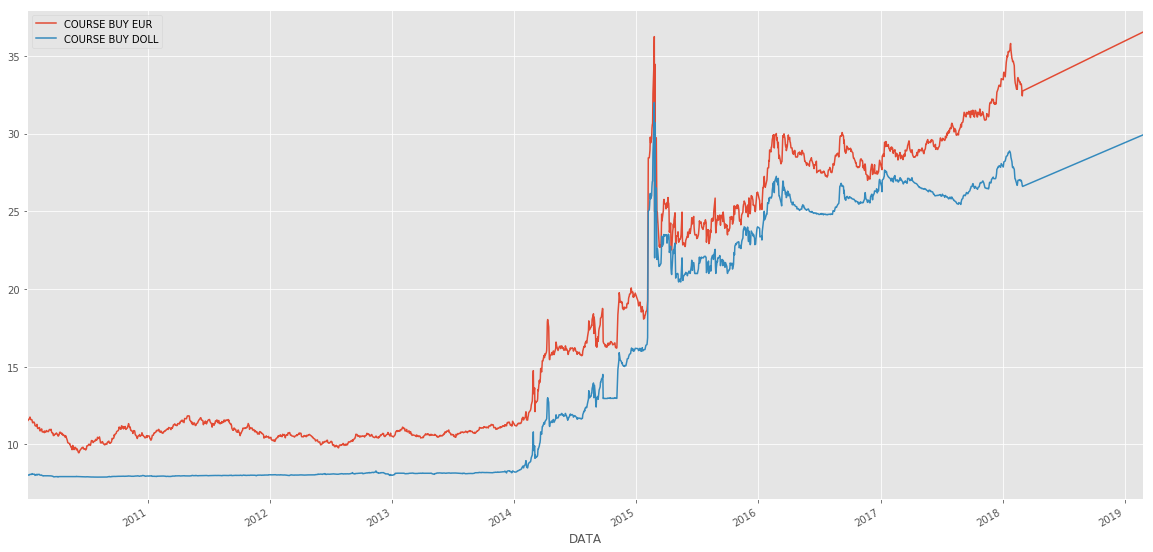

In [32]:
data_p.plot()
plt.show()

In [33]:
i = 0
dt = data['DATA'].as_matrix()
for i in range(360):
    
    last_date = dt[-1]
    last_date += np.timedelta64(1, 'D')
    dt = np.append(dt, last_date)


dt_prog = data['COURSE BUY EUR'].as_matrix()

i = 0
for i in range(360):
    dt_prog = np.append(dt_prog,dt_prog[-1] * atzp_1_eur[0])
    
dt_prog_d = data['COURSE BUY DOLL'].as_matrix()
i = 0
for i in range(360):
    dt_prog_d = np.append(dt_prog_d,dt_prog_d[-1] * atzp_1_dol[0])

    
data_p = pd.DataFrame(dt, columns=['DATA'])
data_p['COURSE BUY EUR'] = pd.DataFrame(dt_prog)
data_p['COURSE BUY DOLL'] = pd.DataFrame(dt_prog_d)
data_p = data_p.set_index('DATA')

data_p

,COURSE BUY EUR,COURSE BUY DOLL
DATA,,
2010-01-04,11.452000,7.982000
2010-01-05,11.511000,7.978000
2010-01-06,11.511000,8.027000
2010-01-11,11.656000,8.025000
2010-01-12,11.674000,8.057000
2010-01-13,11.755000,8.069000
2010-01-14,11.691000,8.073000
2010-01-15,11.592000,8.063000
2010-01-18,11.594000,8.066000


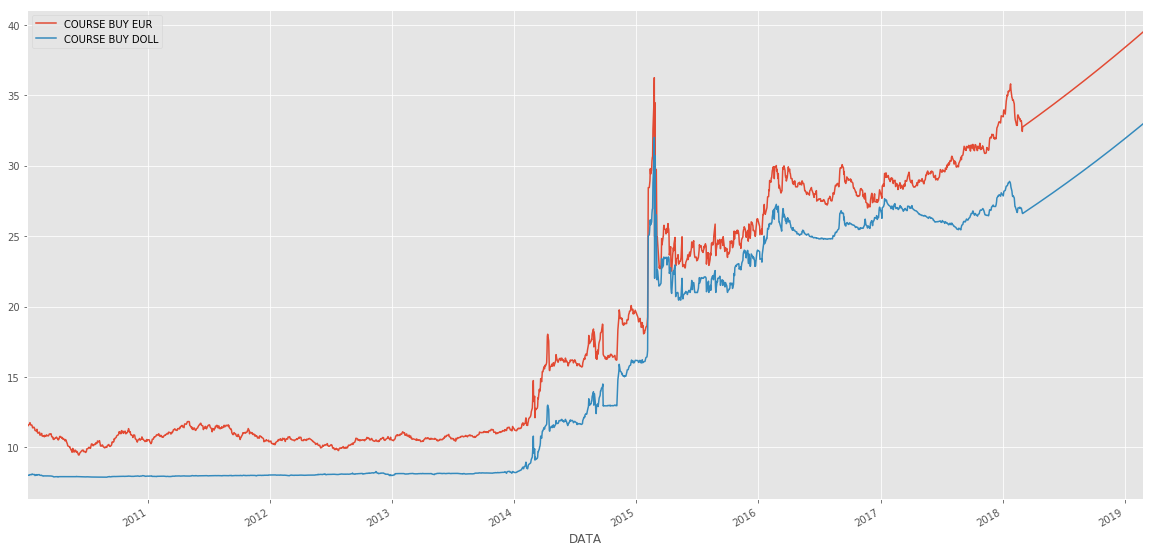

In [34]:
data_p.plot()
plt.show()

In [35]:
# Даний метод не дозволя естраполювати ряди в даному випадку

i = 0
dt = data['DATA'].as_matrix()
for i in range(360):
    
    last_date = dt[-1]
    last_date += np.timedelta64(1, 'D')
    dt = np.append(dt, last_date)


dt_prog = data['COURSE BUY EUR'].as_matrix()
print(dt_prog[-1]) 
i = 0
for i in range(360):
    #dt_prog = np.append(dt_prog,(dt_prog[-1] * 0.2 + dt_prog[-2] * 0.2 + dt_prog[-3] * 0.2 + dt_prog[-4] * 0.2 + dt_prog[-5] * 0.2))
    dt_prog = np.append(dt_prog,(dt_prog[-1] * 0.2 + dt_prog[-2] * 0.2 + dt_prog[-3] * 0.2 + dt_prog[-4] * 0.2 + dt_prog[-5] * 0.2))
print(dt_prog[-1])    
dt_prog_d = data['COURSE BUY DOLL'].as_matrix()
i = 0
for i in range(360):
    dt_prog_d = np.append(dt_prog_d,(dt_prog_d[-1] * 0.2 + dt_prog_d[-2] * 0.2 + dt_prog_d[-3] * 0.2 + dt_prog_d[-4] * 0.2 + dt_prog_d[-5] * 0.2))

    
data_p = pd.DataFrame(dt, columns=['DATA'])
data_p['COURSE BUY EUR'] = pd.DataFrame(dt_prog)
data_p['COURSE BUY DOLL'] = pd.DataFrame(dt_prog_d)
data_p = data_p.set_index('DATA')



data_p

32.7419
32.7165133333


,COURSE BUY EUR,COURSE BUY DOLL
DATA,,
2010-01-04,11.452000,7.982000
2010-01-05,11.511000,7.978000
2010-01-06,11.511000,8.027000
2010-01-11,11.656000,8.025000
2010-01-12,11.674000,8.057000
2010-01-13,11.755000,8.069000
2010-01-14,11.691000,8.073000
2010-01-15,11.592000,8.063000
2010-01-18,11.594000,8.066000


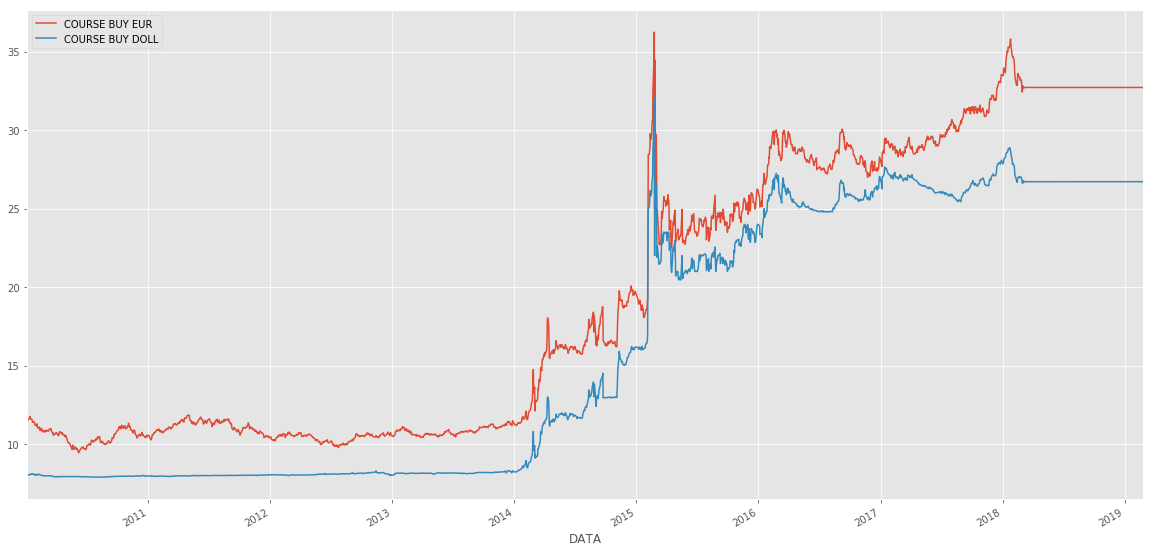

In [36]:
data_p.plot()
plt.show()

In [37]:
# Даний метод не дозволя естраполювати ряди в даному випадку

i = 0
dt = data['DATA'].as_matrix()
for i in range(360):
    
    last_date = dt[-1]
    last_date += np.timedelta64(1, 'D')
    dt = np.append(dt, last_date)


r= 6
i = 3
for i in range (360):
    r = r + i + 1
    
print (361/r)


l = []
i = 0
for i in range(360):
    l.append(((i+1)*0.005555042624565291)/361)
print(l)    

dt_prog = data['COURSE BUY EUR'].as_matrix()
data_bas_analis_eur.reset_index()
dt_delta_e = data_bas_analis_eur['LAN PRIRIST'].loc[1:].as_matrix()
print(dt_delta_e)
i = 0
for i in range(360):
    j = 0
    dt_prog_j = dt_prog[-1]
    for j in range(len(l)-i):
        dt_prog_j = dt_prog_j + dt_delta_e[-j] * l[-j]
        
    dt_prog = np.append(dt_prog,dt_prog_j)
   
dt_prog_d = data['COURSE BUY DOLL'].as_matrix()
data_bas_analis_dol.reset_index()
dt_delta_d = data_bas_analis_dol['LAN PRIRIST'].loc[1:].as_matrix()
i = 0
for i in range(360):
    j = 0
    dt_prog_j = dt_prog_d[-1]
    for j in range(len(l)-i):
        dt_prog_j = dt_prog_j + dt_delta_d[-j] * l[-j] 
    dt_prog_d = np.append(dt_prog_d,dt_prog_j)
     
data_p = pd.DataFrame(dt, columns=['DATA'])
data_p['COURSE BUY EUR'] = pd.DataFrame(dt_prog)
data_p['COURSE BUY DOLL'] = pd.DataFrame(dt_prog_d)
data_p = data_p.set_index('DATA') 



data_p

0.005555042624565291
[1.5387929707937095e-05, 3.077585941587419e-05, 4.616378912381128e-05, 6.155171883174838e-05, 7.693964853968547e-05, 9.232757824762255e-05, 0.00010771550795555965, 0.00012310343766349676, 0.00013849136737143384, 0.00015387929707937095, 0.00016926722678730803, 0.0001846551564952451, 0.00020004308620318222, 0.0002154310159111193, 0.0002308189456190564, 0.0002462068753269935, 0.00026159480503493057, 0.0002769827347428677, 0.0002923706644508048, 0.0003077585941587419, 0.00032314652386667894, 0.00033853445357461605, 0.00035392238328255316, 0.0003693103129904902, 0.0003846982426984273, 0.00040008617240636443, 0.0004154741021143015, 0.0004308620318222386, 0.0004462499615301757, 0.0004616378912381128, 0.00047702582094604986, 0.000492413750653987, 0.0005078016803619241, 0.0005231896100698611, 0.0005385775397777982, 0.0005539654694857353, 0.0005693533991936725, 0.0005847413289016096, 0.0006001292586095467, 0.0006155171883174838, 0.0006309051180254208, 0.0006462930477333579, 

,COURSE BUY EUR,COURSE BUY DOLL
DATA,,
2010-01-04,11.452000,7.982000
2010-01-05,11.511000,7.978000
2010-01-06,11.511000,8.027000
2010-01-11,11.656000,8.025000
2010-01-12,11.674000,8.057000
2010-01-13,11.755000,8.069000
2010-01-14,11.691000,8.073000
2010-01-15,11.592000,8.063000
2010-01-18,11.594000,8.066000


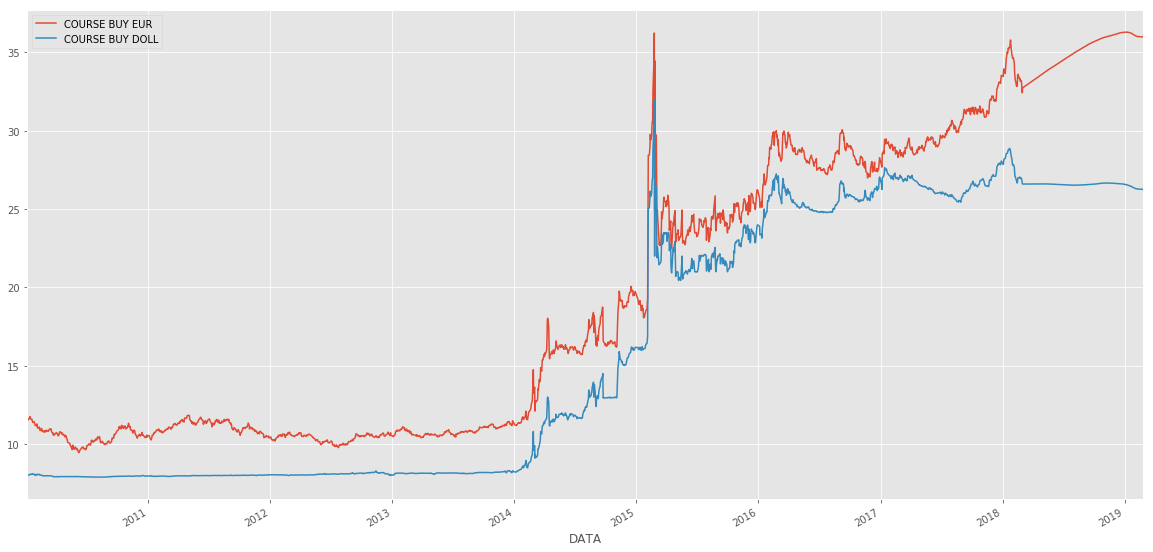

In [38]:
data_p.plot()
plt.show()

In [39]:


u = [0]
l = [0]

data_prog = data['COURSE BUY EUR'].as_matrix()
i =0
for i in range(len(data_prog)-1):

    if data_prog[i+1] >= data_prog[:i+1].max():
        
        u.append(1)
    else:
        u.append(0)
    if data_prog[i+1] <= data_prog[:i+1].min():
        l.append(1)
    else:
        l.append(0)
dt_u = pd.DataFrame(u,columns=['COURSE BUY EUR'])
dt_l = pd.DataFrame(l,columns=['COURSE BUY EUR'])

dt_s = dt_u + dt_l
dt_d = dt_u - dt_l

S = dt_s.sum()
D = dt_d.sum()

Q = dt_d.mean()
M = dt_s.mean()

std_s = dt_s.std()
std_d = dt_d.std()

t_s = abs(S-M)/std_s
t_d = abs(D-Q)/std_d

print(t_s)
print(t_d)

COURSE BUY EUR    407.414086
dtype: float64
COURSE BUY EUR    96.161155
dtype: float64


In [40]:
p_s = sp.t.cdf(t_s,df=len(dt_s)-1)
p_d = sp.t.cdf(t_d,df=len(dt_d)-1)

print(p_s)
print(p_d)

t_c_s = sp.t.pdf(t_s,df=len(dt_s)-1)
t_c_d = sp.t.pdf(t_d,df=len(dt_d)-1)
print(t_c_s)
print(t_c_d)

[ 1.]
[ 1.]
[ 0.]
[ 0.]


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3845: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


In [41]:
#INDZ 3

In [42]:
data.reset_index()

X = data.index.values
X = X[np.newaxis, :]

y = data['COURSE BUY EUR'].as_matrix()


clf = linear_model.LogisticRegression()
clf.fit(X, y)


plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(X.ravel(), color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1, 2022]

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


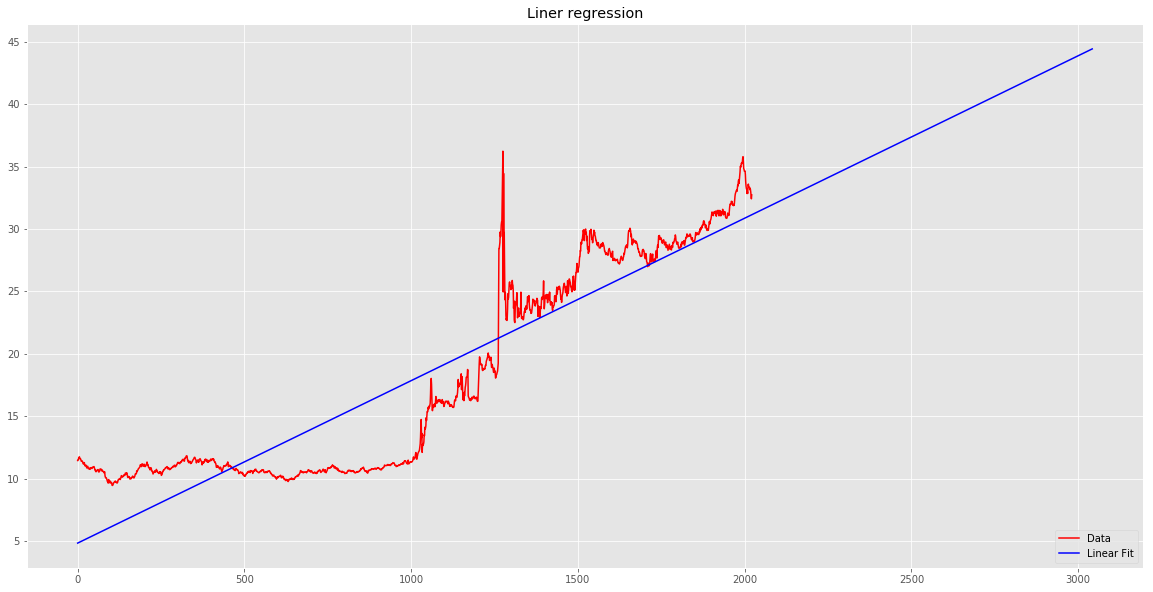

In [43]:
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression

data.reset_index()
i = 0
dt = data['DATA'].as_matrix()
for i in range(1020):
    
    last_date = dt[-1]
    last_date += np.timedelta64(1, 'D')
    dt = np.append(dt, last_date)
x = data.index.values
y = data['COURSE BUY EUR']

x_pred = x

for i in range(1020):
    
    x_pred = np.append(x_pred,len(x_pred) + 1)



lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  
print(lr.get_params())

fig = plt.figure()
plt.plot(x, y, 'r', markersize=12)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis]), 'b')
plt.plot(x = dt)
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Liner regression')

y_true = y
y_pred = lr.predict(x[:, np.newaxis])


plt.show()

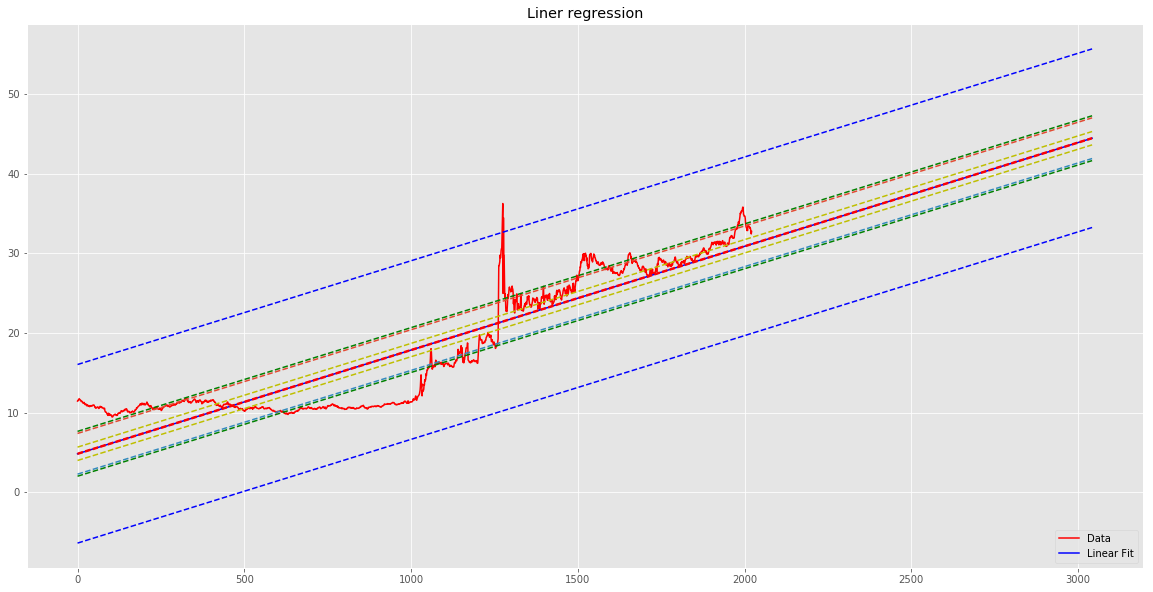

In [44]:
fig = plt.figure()
plt.plot(x, y, 'r', markersize=12)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis]), 'b')
plt.plot(x = dt)
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Liner regression')

y_true = y
y_pred = lr.predict(x[:, np.newaxis])

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+evs, 'y--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-evs, 'y--')

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+mae, 'g--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-mae, 'g--')

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+mse, 'b--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-mse, 'b--')

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+msle, 'r--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-msle, 'r--')


from sklearn.metrics import median_absolute_error
mde = median_absolute_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+mde, '--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-mde, '--')
plt.show()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


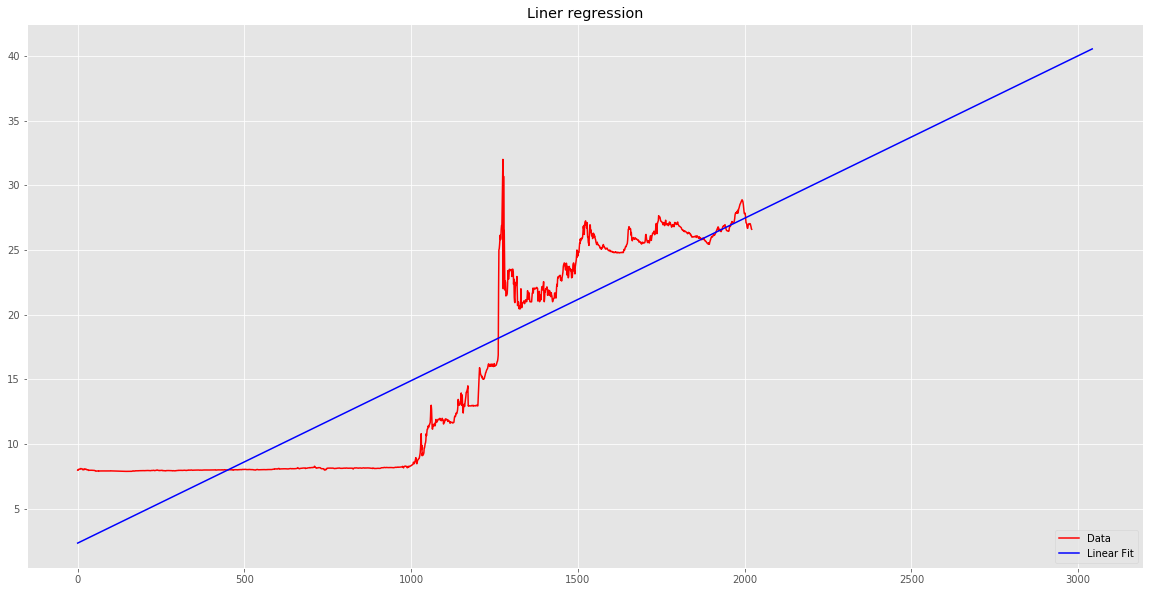

In [45]:
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression

data.reset_index()
i = 0
dt = data['DATA'].as_matrix()
for i in range(1020):
    
    last_date = dt[-1]
    last_date += np.timedelta64(1, 'D')
    dt = np.append(dt, last_date)
x = data.index.values
y = data['COURSE BUY DOLL']

x_pred = x

for i in range(1020):
    
    x_pred = np.append(x_pred,len(x_pred) + 1)



lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  
print(lr.get_params())

fig = plt.figure()
plt.plot(x, y, 'r', markersize=12)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis]), 'b')
plt.plot(x = dt)
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Liner regression')

y_true = y
y_pred = lr.predict(x[:, np.newaxis])


plt.show()

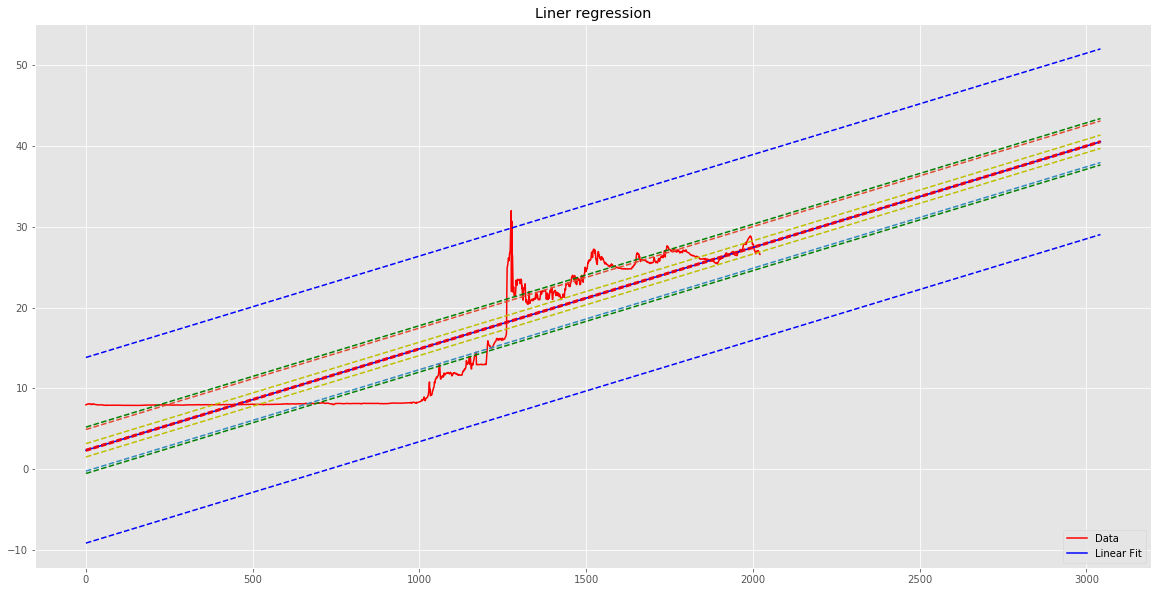

In [46]:
fig = plt.figure()
plt.plot(x, y, 'r', markersize=12)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis]), 'b')
plt.plot(x = dt)
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Liner regression')

y_true = y
y_pred = lr.predict(x[:, np.newaxis])

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+evs, 'y--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-evs, 'y--')

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+mae, 'g--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-mae, 'g--')

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+mse, 'b--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-mse, 'b--')

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+msle, 'r--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-msle, 'r--')


from sklearn.metrics import median_absolute_error
mde = median_absolute_error(y_true, y_pred)

plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])+mde, '--')
plt.plot(x_pred, lr.predict(x_pred[:, np.newaxis])-mde, '--')
plt.show()